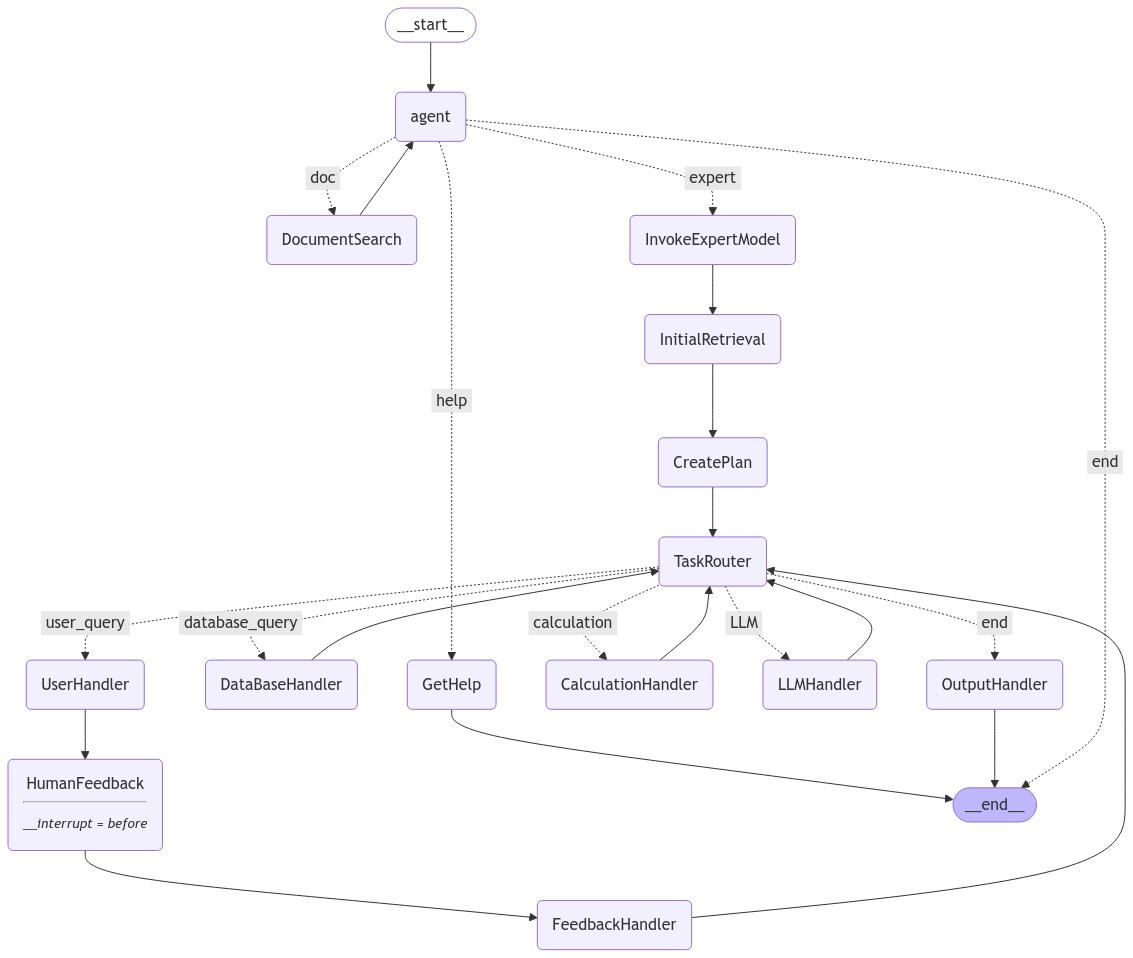

In [4]:
from IPython.display import Image, display
from base_agent.agent import graph
from langchain_core.messages import HumanMessage
import uuid

display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
random_id = str(uuid.uuid4())

In [22]:

config = {"configurable": {"thread_id": random_id}}
user_input = "How do I calculate the snow load for my flat roof?"
message = HumanMessage(content=user_input)

async for event in graph.astream({"messages": message}, config, stream_mode="updates"):
    print(event)

content='' additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_OhdUP5JuSEzQ8BK6nnDOxQOD', 'function': {'arguments': '{"task":"How do I calculate the snow load for my flat roof?"}', 'name': 'InvokeExpertModel'}, 'type': 'function'}]} response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_483d39d857'} id='run-0f149066-d622-4835-8565-6e8a17ec963b-0' tool_calls=[{'name': 'InvokeExpertModel', 'args': {'task': 'How do I calculate the snow load for my flat roof?'}, 'id': 'call_OhdUP5JuSEzQ8BK6nnDOxQOD', 'type': 'tool_call'}]
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_OhdUP5JuSEzQ8BK6nnDOxQOD', 'function': {'arguments': '{"task":"How do I calculate the snow load for my flat roof?"}', 'name': 'InvokeExpertModel'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_483d39d857'}, id

In [23]:
try:
    user_input = input("Tell me how you want to update the state: ")
except:
    user_input = "go to step 3!"

# We now update the state as if we are the human_feedback node
graph.update_state(config, {"messages": user_input}, as_node="HumanFeedback")

# We can check the state
print("--State after update--")
print(graph.get_state(config))

# We can check the next node, showing that it is node 3 (which follows human_feedback)
graph.get_state(config).next

--State after update--
StateSnapshot(values={'messages': [HumanMessage(content='What is the characteristic value for snow loads?', additional_kwargs={}, response_metadata={}, id='cf0384bb-985e-43a5-b93e-74b950522643'), AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_3U6f0aiWZcfvgMc6rCxf1VOD', 'function': {'arguments': '{"query":"characteristic value for snow loads","data_type":"Parameter"}', 'name': 'DocumentRetriever'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_483d39d857'}, id='run-d5bf5f88-6cd3-4160-bb8c-468ea1c9e884-0', tool_calls=[{'name': 'DocumentRetriever', 'args': {'query': 'characteristic value for snow loads', 'data_type': 'Parameter'}, 'id': 'call_3U6f0aiWZcfvgMc6rCxf1VOD', 'type': 'tool_call'}]), ToolMessage(content='{"retrieved information": "Document Placeholder"}', name='DocumentRetriever', id='3fa6785d-4df6-46c8-9028-afb347df21a8', tool_call

('FeedbackHandler',)

In [24]:
async for event in graph.astream(None, config, stream_mode="updates"):
    print(event)

{'FeedbackHandler': {'plan_index': 2, 'step_results': [StepResult(step_number='#E3', result='100 m^2')]}}
Index: 2 Step count: 4
{'TaskRouter': {'log': 'routing to next task...'}}
Augmented Step Input: Determine the snow-fall coefficient c_s based on the snow-fall area from Area 2
{'LLMHandler': {'plan_index': 3, 'step_results': [StepResult(step_number='#E2', result='3.5 [kN/m^2]')]}}
Index: 3 Step count: 4
{'TaskRouter': {'log': 'routing to next task...'}}
#E3 = 100 m^2
#E2 = 3.5 [kN/m^2]

Calculator Input: F_s = 100 m^2 * 3.5 kN/m^2
Augmented Step Input: Calculate F_s = #E3 * #E2
{'CalculationHandler': {'plan_index': 4, 'step_results': [StepResult(step_number='#E4', result='F_s = 350 kN (kilonewtons)')]}}
Index: 4 Step count: 4
{'TaskRouter': {'log': 'routing to next task...'}}
{'OutputHandler': {'messages': [AIMessage(content='To calculate the snow load for a flat roof, we followed a structured plan that involved determining the snow-fall area, the corresponding snow-fall coefficien

In [ ]:
async for event in graph.astream_events({"messages": inputs}, version="v2"):
    kind = event["event"]
    print(f"{kind}: {event['name']}")

In [25]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time as a string in the desired format
date_time_str = now.strftime("%Y-%m-%dT%H:%M:%S.%fZ")

print(date_time_str)

2024-09-16T16:11:03.402503Z
